### Today:
* Logistic regression
    * Model
    * Cost function
    * Optimization
    * Model selection
    * Evaluating classification models

### Resources:
* Logistic regression: https://mcerovic.github.io/notes/LogisticRegression/index.html
* Evaluating model http://mlwiki.org/index.php/Precision_and_Recall#F_Measure

# Logistic Regression

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
# Load dataset as numpy array
data = np.loadtxt('../../data/03_LogisticRegression/lr_data.csv', delimiter=',')

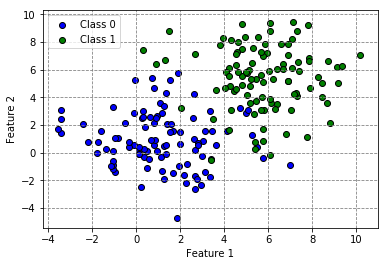

In [3]:
# Find index of samples with class 0
idx = data[:, 2] == 0.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

In [4]:
# Split dataset on features and labels
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)
print(x_data.shape, y_data.shape)

(200, 2) (200, 1)


In [5]:
# Define parameters
n_features = 2
n_samples = len(data)
learning_rate = 0.01
training_epochs = 10000

In [6]:
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, 1], "y")

W = tf.Variable(tf.random_normal([n_features, 1]), name="W")
b = tf.Variable(tf.random_normal([1, 1]), name="b")

## Model

In [7]:
h = tf.sigmoid(tf.add(tf.matmul(X, W), b))

## Cost function

In [8]:
cost = tf.reduce_mean(-tf.multiply(y, tf.log(h)) - 
                      tf.multiply(tf.subtract(1.0, y), tf.log(tf.subtract(1.0, h))))

## Optimization

In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train and save the model

In [10]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        
        _, err = sess.run([train_op, cost], {X: x_data, y: y_data})
        
        if epoch % 1000 == 0:
            print(epoch, err)
            
    
    W_computed, b_computed = sess.run([W, b])

0 1.0275387
1000 0.2998057
2000 0.2372856
3000 0.20834747
4000 0.19173028
5000 0.1809676
6000 0.17344631
7000 0.16790871
8000 0.1636739
9000 0.1603406


Pošto radim u dve dimenzije, možemo nacrtati jednačinu rešavanjem jedne vrednosti preko druge. Jednačina modela je $ x_{2}w_{2} + x_{1}w_{1} + w_{0} $ i rešavanjem po $x_{1}$ dobijamo da je vrednost za $$ x_{2} = \frac{-w_{0} - w_{1}x_{1}}{w_{2}} $$

In [11]:
parameters = [b_computed[0][0], W_computed[1][0], W_computed[0][0]]

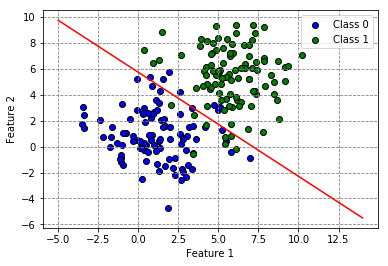

In [12]:
x = np.arange(-5, 15)
y = (-parameters[0] - parameters[1] * x) / parameters[2]
ax.plot(x, y, '-', color='r', marker=' ')
fig